## 1. Import and Install

In [1]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

> set up media pipe holistic model & media pipe drawing utilities

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections

In [6]:
def draw_styled_landmarks(image, results):
   
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
    # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)

                            )

> Built a loop to extract the values

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

> Printing each of the individual values for one landmark

In [16]:
results.right_hand_landmarks

landmark {
  x: 0.024800122
  y: 0.6596949
  z: 3.531253e-07
}
landmark {
  x: 0.09826425
  y: 0.6690579
  z: -0.031131696
}
landmark {
  x: 0.1741058
  y: 0.6539713
  z: -0.04187744
}
landmark {
  x: 0.22967598
  y: 0.6169772
  z: -0.050543487
}
landmark {
  x: 0.2748878
  y: 0.5920682
  z: -0.05837153
}
landmark {
  x: 0.18297657
  y: 0.51419115
  z: -0.0118279625
}
landmark {
  x: 0.22873631
  y: 0.4493166
  z: -0.025474373
}
landmark {
  x: 0.24929617
  y: 0.402687
  z: -0.040346477
}
landmark {
  x: 0.26421395
  y: 0.35891712
  z: -0.052179653
}
landmark {
  x: 0.14893472
  y: 0.47467935
  z: -0.009708914
}
landmark {
  x: 0.18261921
  y: 0.389736
  z: -0.020433849
}
landmark {
  x: 0.19601524
  y: 0.3334008
  z: -0.03567042
}
landmark {
  x: 0.20478436
  y: 0.28461808
  z: -0.04780268
}
landmark {
  x: 0.10854575
  y: 0.45579422
  z: -0.012006738
}
landmark {
  x: 0.13607381
  y: 0.37609988
  z: -0.025156137
}
landmark {
  x: 0.1497965
  y: 0.32384259
  z: -0.037505683
}
landmark

In [17]:
results

mediapipe.python.solution_base.SolutionOutputs

In [18]:
draw_landmarks(frame, results)

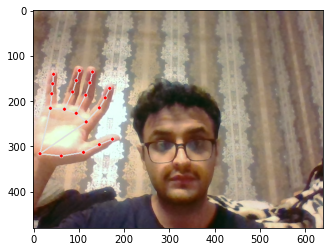

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [20]:
len(results.right_hand_landmarks.landmark or results.left_hand_landmarks.landmark)

21

In [21]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [22]:
type(results.right_hand_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

## 3. Extract Keypoint Values

In [23]:
results.right_hand_landmarks.landmark[0].x

0.024800121784210205

In [24]:
rh = []
for res in results.right_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    rh.append(test)

In [25]:
rh

[array([2.48001218e-02, 6.59694910e-01, 3.53125301e-07]),
 array([ 0.09826425,  0.66905791, -0.0311317 ]),
 array([ 0.17410579,  0.65397131, -0.04187744]),
 array([ 0.22967598,  0.61697721, -0.05054349]),
 array([ 0.2748878 ,  0.5920682 , -0.05837153]),
 array([ 0.18297657,  0.51419115, -0.01182796]),
 array([ 0.22873631,  0.44931659, -0.02547437]),
 array([ 0.24929617,  0.40268701, -0.04034648]),
 array([ 0.26421395,  0.35891712, -0.05217965]),
 array([ 0.14893472,  0.47467935, -0.00970891]),
 array([ 0.18261921,  0.389736  , -0.02043385]),
 array([ 0.19601524,  0.33340079, -0.03567042]),
 array([ 0.20478436,  0.28461808, -0.04780268]),
 array([ 0.10854575,  0.45579422, -0.01200674]),
 array([ 0.13607381,  0.37609988, -0.02515614]),
 array([ 0.1497965 ,  0.32384259, -0.03750568]),
 array([ 0.16043188,  0.27899367, -0.0467633 ]),
 array([ 0.06058252,  0.45148033, -0.01760169]),
 array([ 0.06472173,  0.38359892, -0.03222056]),
 array([ 0.06776216,  0.337699  , -0.03919837]),
 array([ 0.

In [26]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [28]:
rh

array([ 2.48001218e-02,  6.59694910e-01,  3.53125301e-07,  9.82642472e-02,
        6.69057906e-01, -3.11316960e-02,  1.74105793e-01,  6.53971314e-01,
       -4.18774411e-02,  2.29675978e-01,  6.16977215e-01, -5.05434871e-02,
        2.74887800e-01,  5.92068195e-01, -5.83715290e-02,  1.82976574e-01,
        5.14191151e-01, -1.18279625e-02,  2.28736311e-01,  4.49316591e-01,
       -2.54743733e-02,  2.49296173e-01,  4.02687013e-01, -4.03464772e-02,
        2.64213949e-01,  3.58917117e-01, -5.21796532e-02,  1.48934722e-01,
        4.74679351e-01, -9.70891397e-03,  1.82619214e-01,  3.89735997e-01,
       -2.04338487e-02,  1.96015239e-01,  3.33400786e-01, -3.56704183e-02,
        2.04784364e-01,  2.84618080e-01, -4.78026792e-02,  1.08545750e-01,
        4.55794215e-01, -1.20067382e-02,  1.36073813e-01,  3.76099885e-01,
       -2.51561366e-02,  1.49796501e-01,  3.23842585e-01, -3.75056826e-02,
        1.60431877e-01,  2.78993666e-01, -4.67632972e-02,  6.05825186e-02,
        4.51480329e-01, -

In [27]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
len(rh)

63

In [30]:
def extract_keypoints(results):
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [33]:
21*3+21*3

126

In [34]:
np.save('0', result_test)

In [35]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

## 4. Setup Folders for Collection

In [36]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['مرحبا',
                    'عمل جيد',
                    'هاتف',
                    'شكرا',
                    'وداعا'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [37]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [39]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
label_map = {label:num for num, label in enumerate(actions)}   # create a label map to represent each on of our different action

In [42]:
label_map

{'مرحبا': 0, 'عمل جيد': 1, 'هاتف': 2, 'شكرا': 3, 'وداعا': 4}

In [43]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [44]:
np.array(sequences).shape

(150, 30, 126)

In [45]:
np.array(labels).shape

(150,)

In [46]:
X = np.array(sequences)

In [47]:
X.shape

(150, 30, 126)

In [56]:
21*3+21*3


126

In [57]:
126*30*150

567000

In [48]:
y = to_categorical(labels).astype(int)

In [49]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [51]:
X_train.shape

(142, 30, 126)

In [53]:
X_test.shapeape

(8, 30, 126)

In [54]:
y_train.shape

(142, 5)

In [55]:
y_test.shape

(8, 5)